In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy import stats

import seaborn as sns
from math import sqrt
import warnings
warnings.filterwarnings('ignore')


from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Dense, Activation

In [2]:
df = pd.read_csv("BlackFriday.csv")
#Reading the dataframe

In [3]:
df.head()
#Checking few initial rows of the dataframe

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [117]:
df.shape

(537577, 12)

In [4]:
df.isnull().sum()
#Checking for the null values

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [5]:
list(df.columns)
#Checking the list (name) of Columns

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [6]:
df.info()
#Checking the categorical and numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [7]:
df.dtypes
#Checking data types

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

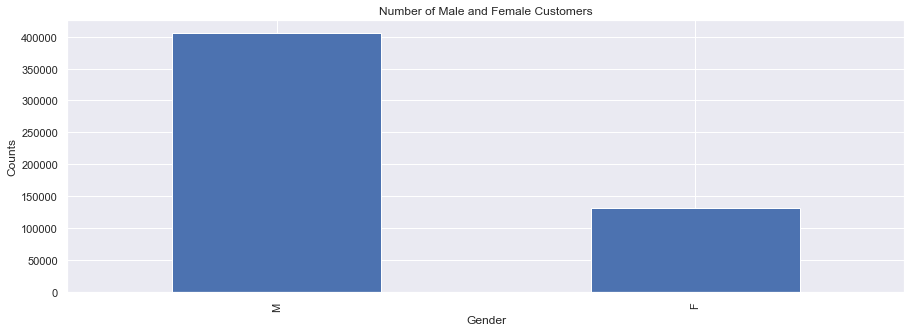

In [122]:
#Total number of Males and Females
plt.figure(figsize=(15,5))
df.Gender.value_counts().plot(kind="bar")
plt.xlabel("Gender")
plt.ylabel("Counts")
plt.title("Number of Male and Female Customers")
plt.savefig("Gender Distribution of customers.jpg")
plt.show()

In [9]:
df.Occupation.value_counts()
# df.Occupation.value_counts().sort_index()

4     70862
0     68120
7     57806
1     45971
17    39090
20    32910
12    30423
14    26712
2     25845
16    24790
6     19822
3     17366
10    12623
5     11985
15    11812
11    11338
19     8352
13     7548
18     6525
9      6153
8      1524
Name: Occupation, dtype: int64

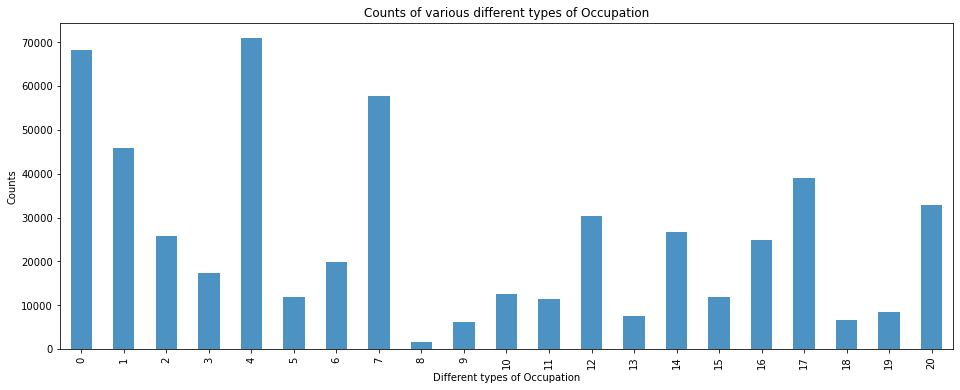

In [48]:
#Counts of various different types of Occupation
plt.figure(figsize= (16,6))                                                # Define size of the figure
df.Occupation.value_counts().sort_index().plot(kind='bar', alpha=0.8)      # Value counts of the occupation
plt.title('Counts of various different types of Occupation')               # Title of the plot
plt.xlabel('Different types of Occupation')                                # Label of the x axis
plt.ylabel('Counts')                                                       # Label of the y axis
plt.savefig('Counts of Occupation.jpg')                                    # Saving the figure
plt.show()

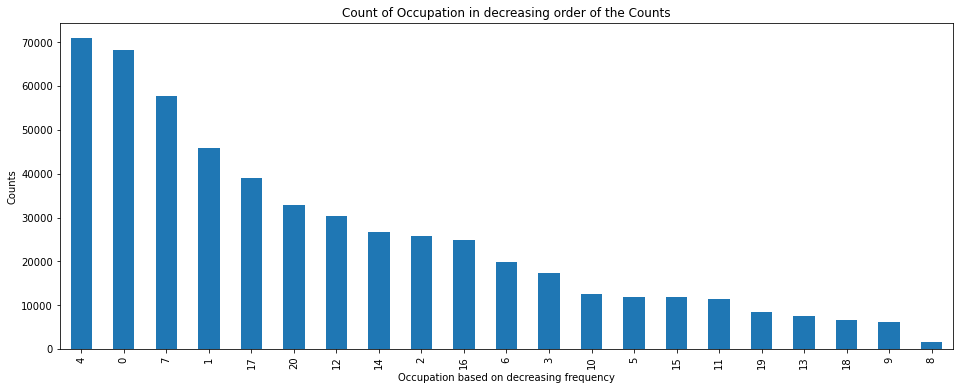

In [58]:
#Count of Occupation in decreasing order of the Counts
plt.figure(figsize=(16,6))                                                                # Figure size
df.Occupation.value_counts().plot(kind='bar')                                             # Occupation value counts
plt.xlabel("Occupation based on decreasing frequency")                                    # Labelling the X axis
plt.ylabel("Counts")                                                                      # Labelling the y axis
plt.title("Count of Occupation in decreasing order of the Counts")                        # Title of the fugure
plt.savefig("Count of Occupation in decreasing order of the Counts.jpg", transparent=True)# Saving figure
plt.show()

In [12]:
df.City_Category.value_counts().sort_index()

A    144638
B    226493
C    166446
Name: City_Category, dtype: int64

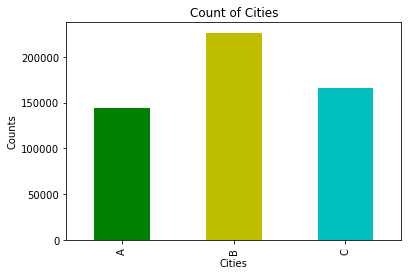

In [61]:
# color=list('rgbkymc')
# plt.figure(figsize=(16,6))
color=list('gyc')
df.City_Category.value_counts().sort_index().plot(kind='bar', color=color)  #Count of Cities
plt.xlabel("Cities")                                                        #Labelling X Axis
plt.ylabel("Counts")                                                        #Labelling y Axis
plt.title("Count of Cities")                                                #Title of the plot
plt.savefig("Count of Cities")                                              #Save figure
plt.show()

In [14]:
df.Stay_In_Current_City_Years.value_counts() #Count of customers with different years of living status in the city 

1     189192
2      99459
3      93312
4+     82889
0      72725
Name: Stay_In_Current_City_Years, dtype: int64

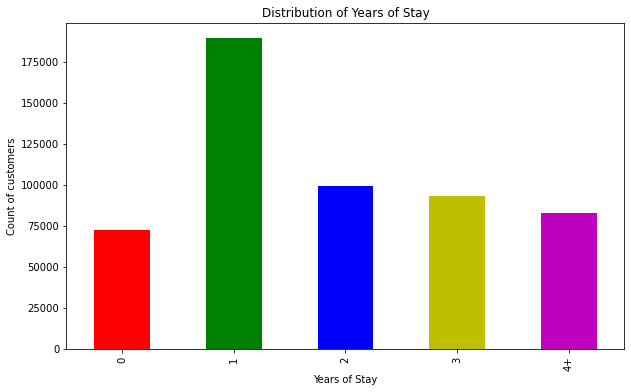

In [63]:
plt.figure(figsize=(10,6))                                                              #define size of the figure 
color=list('rgbymc')
df.Stay_In_Current_City_Years.value_counts().sort_index().plot(kind='bar', color=color) #Most customers staying from one year
plt.xlabel("Years of Stay")
plt.ylabel("Count of customers")
plt.title("Distribution of Years of Stay")
plt.savefig("Distribution of Years of Stay")
plt.show()

In [16]:
print (df.Marital_Status.value_counts())
print (df.Marital_Status.value_counts(normalize=True).mul(100).round(2).astype(str)+ '%')

0    317817
1    219760
Name: Marital_Status, dtype: int64
0    59.12%
1    40.88%
Name: Marital_Status, dtype: object


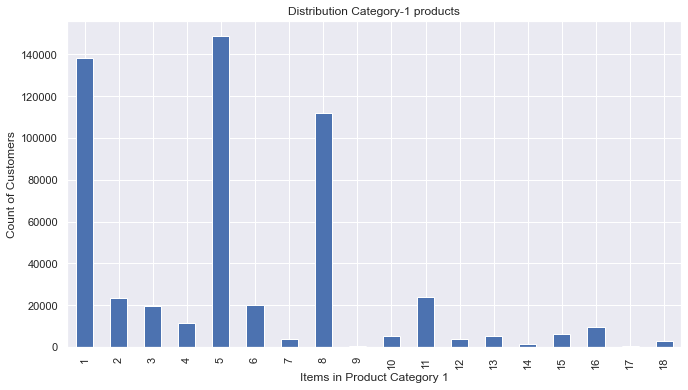

In [124]:
PCat1 = df['Product_Category_1']
plt.figure(figsize=(11,6))
PCat1.value_counts().sort_index().plot(kind='bar')
plt.xlabel("Items in Product Category 1")
plt.ylabel("Count of Customers")
plt.title("Distribution Category-1 products")
plt.savefig("Distribution Category-1 products.jpg")
plt.show()

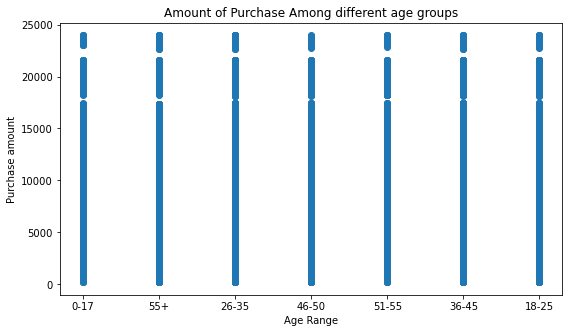

In [71]:
Age = df['Age']
Purchase = df['Purchase']
plt.figure(figsize=(9, 5))
plt.scatter(Age, Purchase)
plt.xlabel("Age Range")
plt.ylabel("Purchase amount")
plt.title("Amount of Purchase Among different age groups")
plt.show()

In [19]:
Age.value_counts().sort_index()

0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
Name: Age, dtype: int64

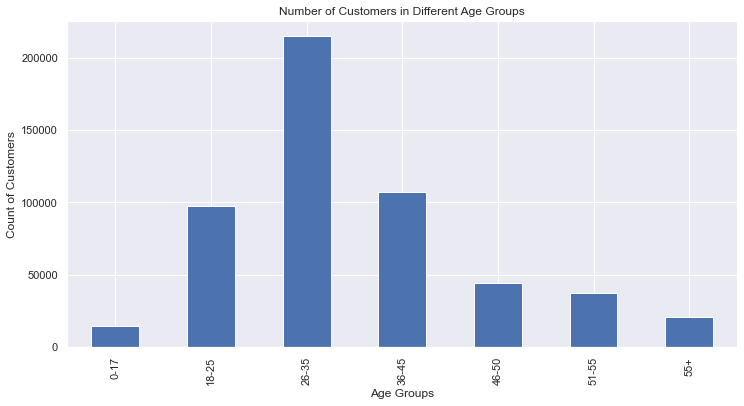

In [125]:
plt.figure(figsize=(12,6))
Age.value_counts().sort_index().plot(kind='bar')
plt.xlabel("Age Groups")
plt.ylabel("Count of Customers")
plt.title("Number of Customers in Different Age Groups")
plt.savefig("Number of Customers in Different Age Groups")
plt.show()

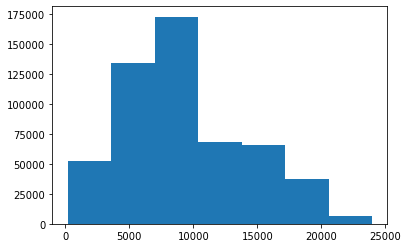

In [21]:
plt.hist(df.Purchase, bins=7)   # I believe this this could also be a better way to look for the data normal distribution
plt.show()

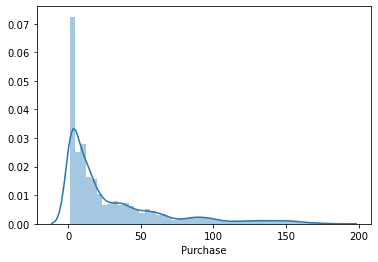

In [22]:
Purchase=df['Purchase'].value_counts()
plt.figure(figsize=(12,4))
sns.distplot(Purchase)

<Figure size 864x360 with 0 Axes>

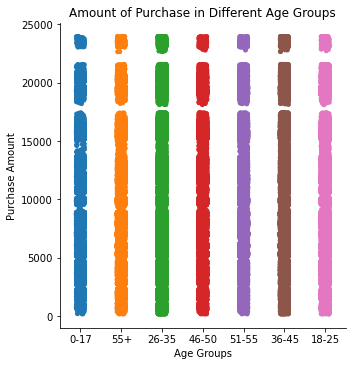

In [75]:
plt.figure(figsize=(12,5))
sns.catplot(x='Age', y='Purchase', data=df);
plt.xlabel("Age Groups")
plt.ylabel("Purchase Amount")
plt.title("Amount of Purchase in Different Age Groups")
plt.savefig("Amount of Purchase in Different Age Groups")
plt.show()

<Figure size 864x432 with 0 Axes>

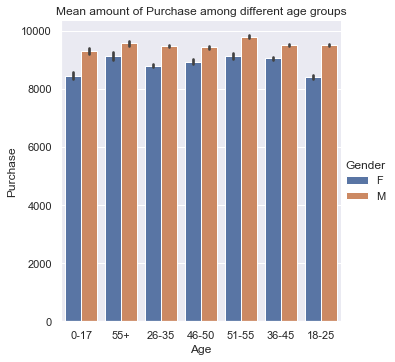

In [127]:
# The "mean" Amount of purchase by Males and Females in enire dataset.  
plt.figure(figsize=(12,6))
sns.catplot(x='Age', y='Purchase', hue='Gender', kind='bar', data=df);  
plt.title("Mean amount of Purchase among different age groups")
plt.savefig("Mean amount of Purchase among different age groups")

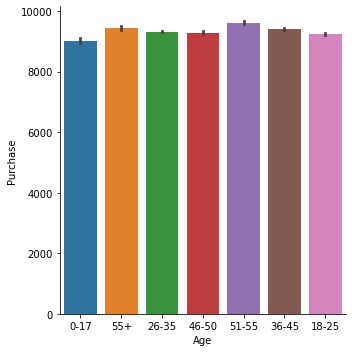

In [26]:
sns.catplot(x='Age', y='Purchase', kind='bar', data=df);

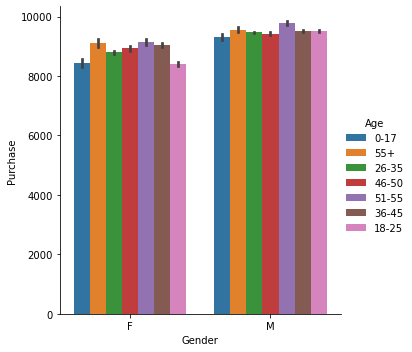

In [27]:
sns.catplot(x='Gender', y='Purchase', hue='Age', kind='bar', data=df);

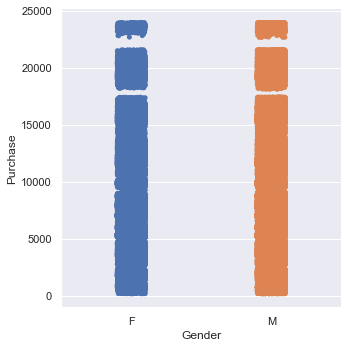

In [97]:
sns.catplot(x="Gender", y="Purchase", data=df);

In [114]:
#The mean value of Purchase amount between Males and Females
df["Purchase"].groupby(df['Gender']).mean()

Gender
F    8809.761349
M    9504.771713
Name: Purchase, dtype: float64

Text(0.5, 1.0, 'The Mean Purchase between Males and Females')

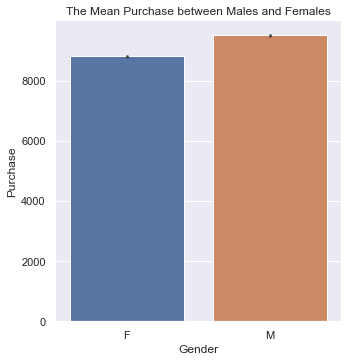

In [115]:
sns.catplot(x="Gender", y="Purchase", kind="bar", data=df);
plt.title("The Mean Purchase between Males and Females")

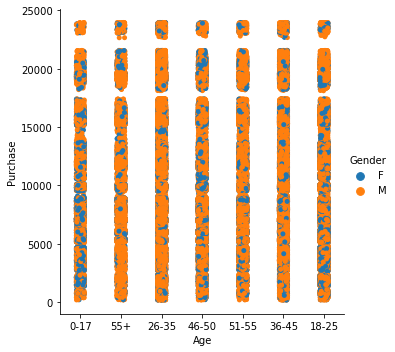

In [28]:
sns.catplot(x='Age', y='Purchase', hue='Gender', data=df);

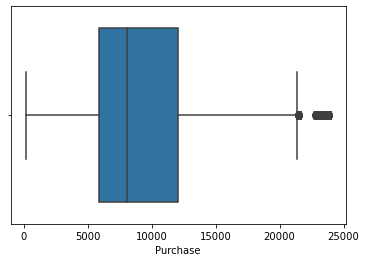

In [29]:
sns.boxplot(x=df['Purchase'])

In [30]:
P_subdf = df[(df.Purchase <= 17000)]
P_subdf.shape

(493230, 12)

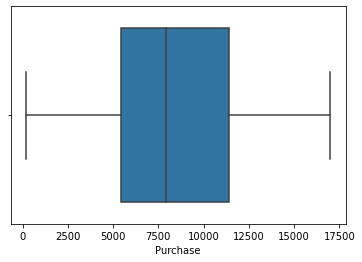

In [31]:
sns.boxplot(x=P_subdf['Purchase'])

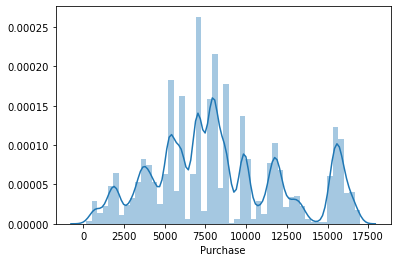

In [32]:
sns.distplot(P_subdf['Purchase'])